In [28]:
import pandas as pd
import numpy as np
import os
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
import scipy

print("Jupyter is working!")

Jupyter is working!


In [29]:
# Define the paths for the datasets
train_path = "train.csv"
test_path = "test.csv"

# Check if both files exist locally
if not os.path.exists(train_path) or not os.path.exists(test_path):
    print("One or both datasets not found locally. Downloading...")
    !kaggle datasets download -d ifteshanajnin/carinsuranceclaimprediction-classification --unzip
else:
    print("Both datasets already exist locally. Skipping download.")

# Load the datasets
dfTrain = pd.read_csv(train_path)
dfTest = pd.read_csv(test_path)

# Verify loading
print("Train Dataset Info:")
print(dfTrain.info())
print("\nTest Dataset Info:")
print(dfTest.info())

Both datasets already exist locally. Skipping download.
Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  obje

In [30]:
# Basic overview for train dataset
print("Train Dataset Shape:", dfTrain.shape)
print("Train Dataset Columns:\n", dfTrain.columns)
print("Train Dataset Data Types:\n", dfTrain.dtypes)
print("\nFirst Few Rows of Train Dataset:\n", dfTrain.head())

# Basic overview for test dataset
print("\nTest Dataset Shape:", dfTest.shape)
print("Test Dataset Columns:\n", dfTest.columns)
print("Test Dataset Data Types:\n", dfTest.dtypes)
print("\nFirst Few Rows of Test Dataset:\n", dfTest.head())


Train Dataset Shape: (58592, 44)
Train Dataset Columns:
 Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')
Train Dataset Data Types:
 policy_id                            object
policy_

Missing Values in Train Dataset:
 policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius  

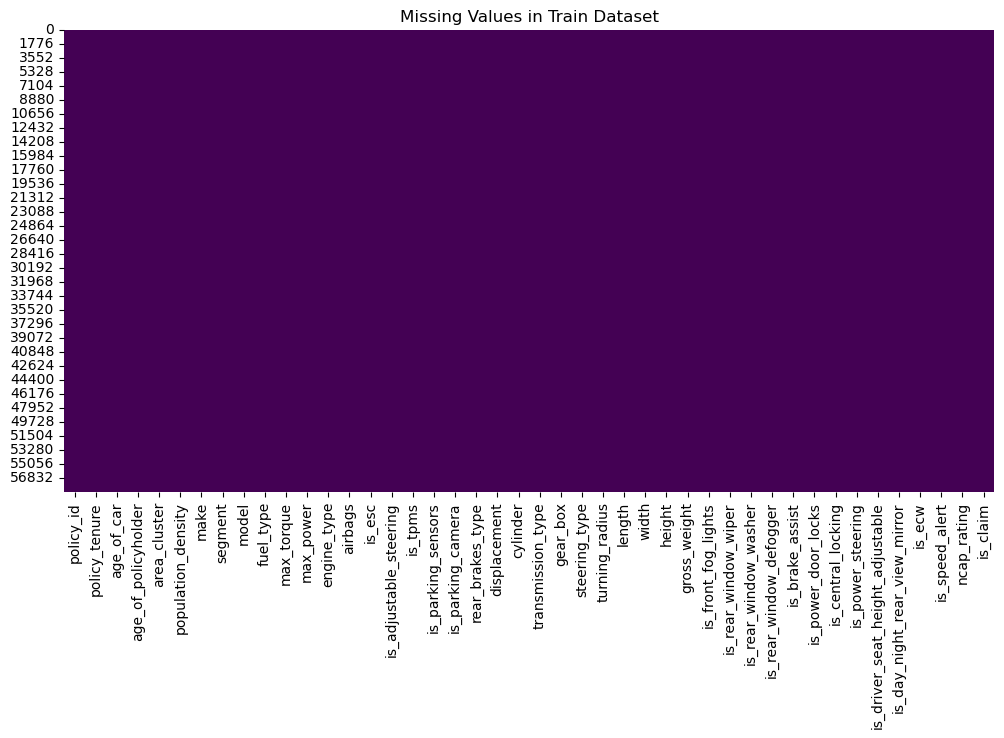

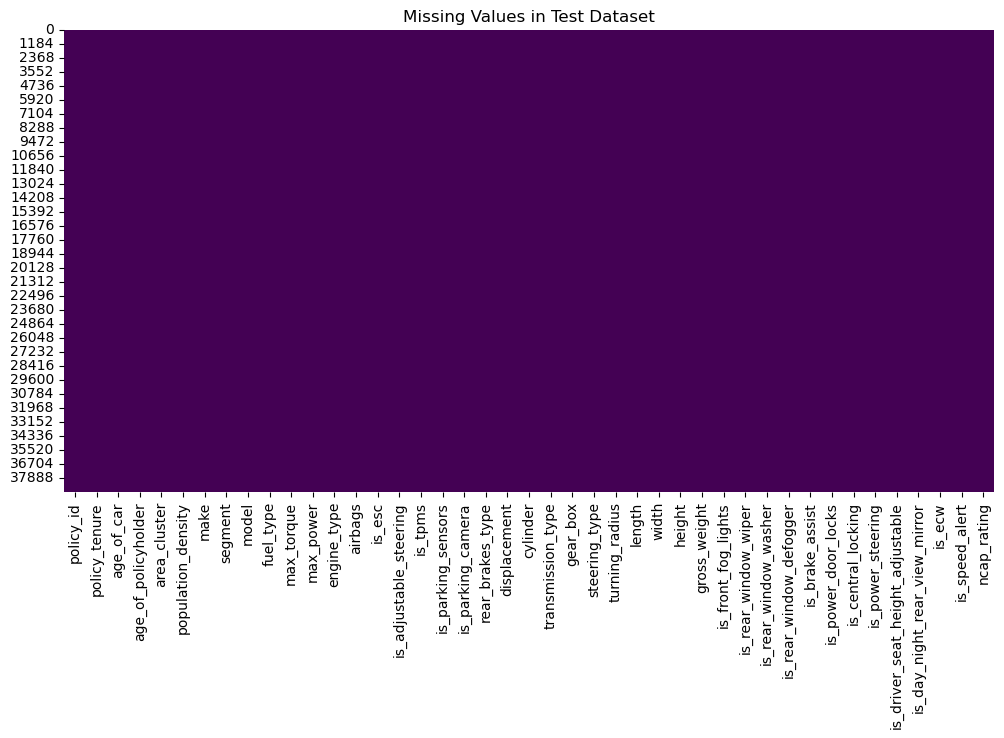

In [31]:
# Check for missing values in train and test datasets
print("Missing Values in Train Dataset:\n", dfTrain.isnull().sum())
print("\nMissing Values in Test Dataset:\n", dfTest.isnull().sum())

# Visualize missing values

plt.figure(figsize=(12, 6))
sns.heatmap(dfTrain.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values in Train Dataset")
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(dfTest.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values in Test Dataset")
plt.show()


In [32]:
# Summary statistics for train dataset
print("Train Dataset Summary Statistics:\n", dfTrain.describe())

# Summary statistics for test dataset
print("\nTest Dataset Summary Statistics:\n", dfTest.describe())

Train Dataset Summary Statistics:
        policy_tenure    age_of_car  age_of_policyholder  population_density  \
count   58592.000000  58592.000000         58592.000000        58592.000000   
mean        0.611246      0.069424             0.469420        18826.858667   
std         0.414156      0.056721             0.122886        17660.174792   
min         0.002735      0.000000             0.288462          290.000000   
25%         0.210250      0.020000             0.365385         6112.000000   
50%         0.573792      0.060000             0.451923         8794.000000   
75%         1.039104      0.110000             0.548077        27003.000000   
max         1.396641      1.000000             1.000000        73430.000000   

               make       airbags  displacement      cylinder      gear_box  \
count  58592.000000  58592.000000  58592.000000  58592.000000  58592.000000   
mean       1.763722      3.137066   1162.355851      3.626963      5.245443   
std        1.136

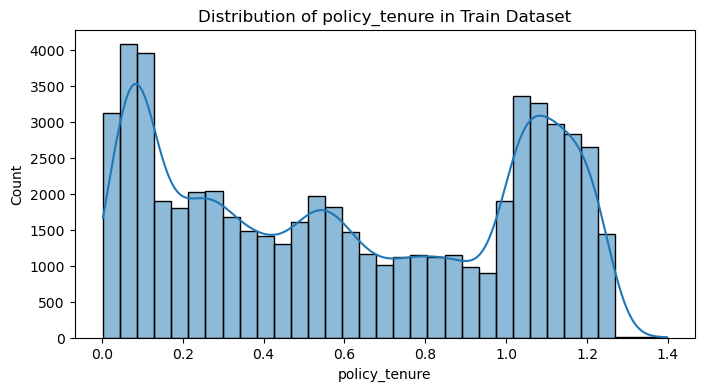

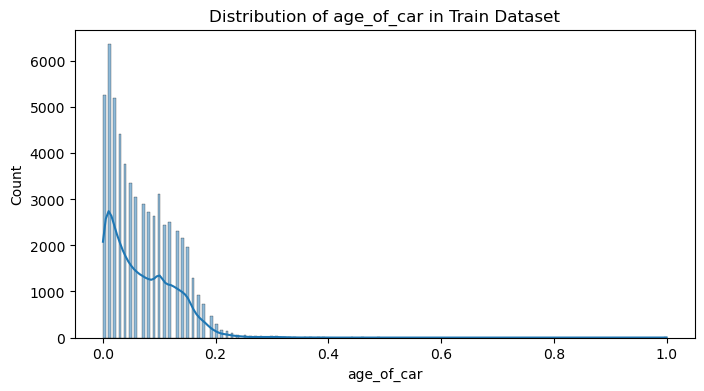

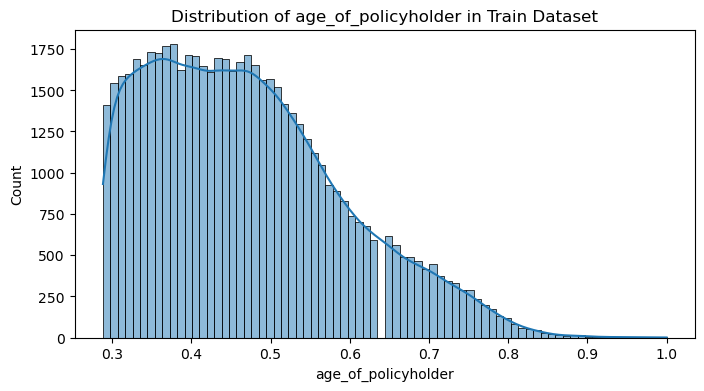

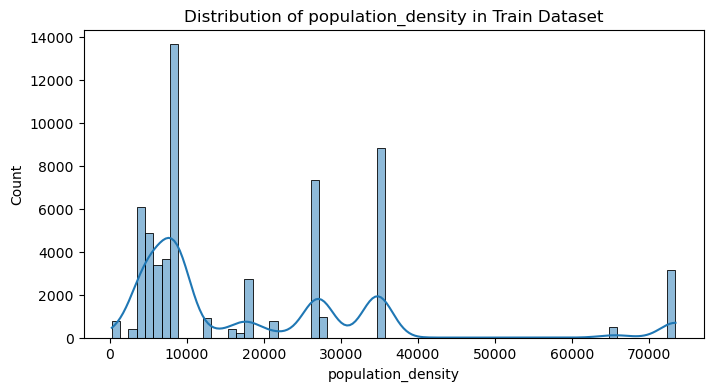

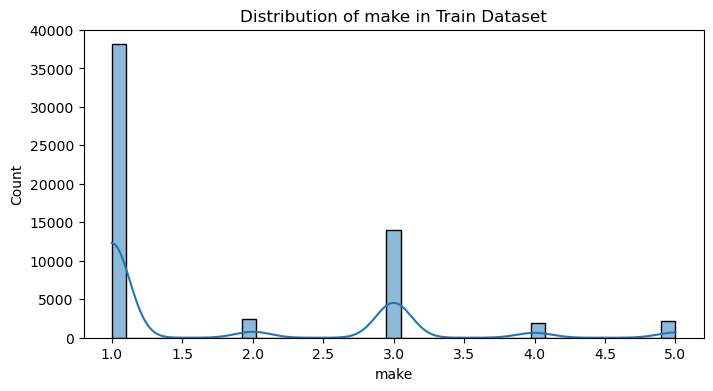

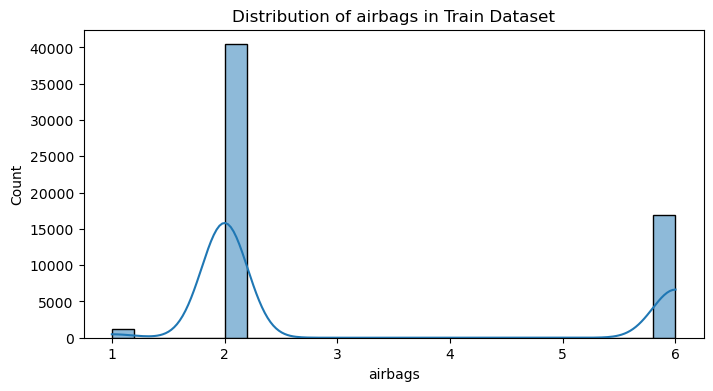

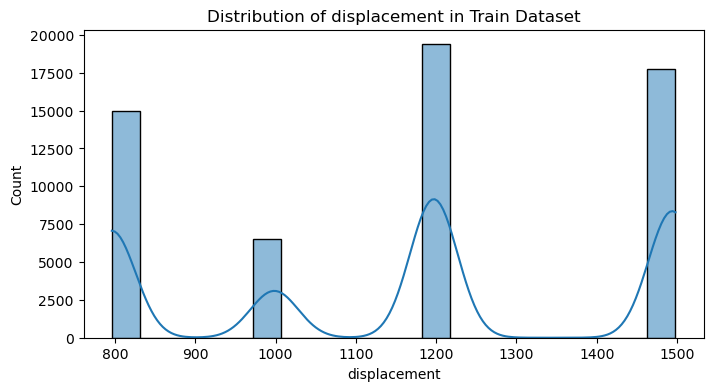

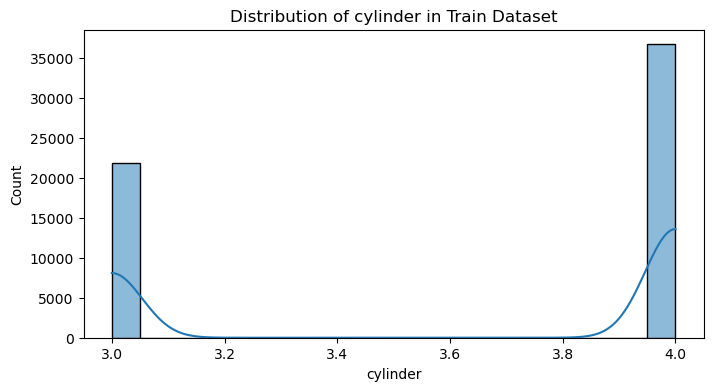

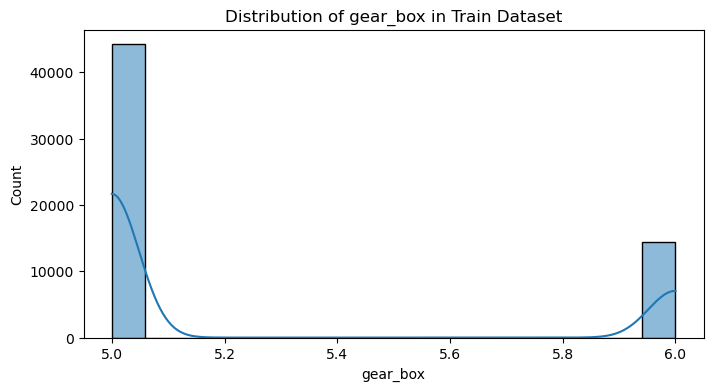

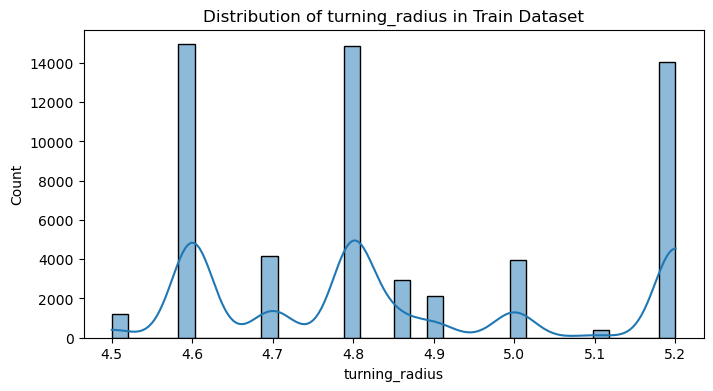

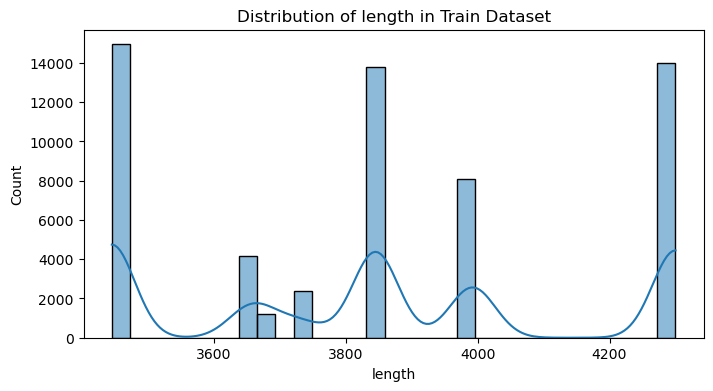

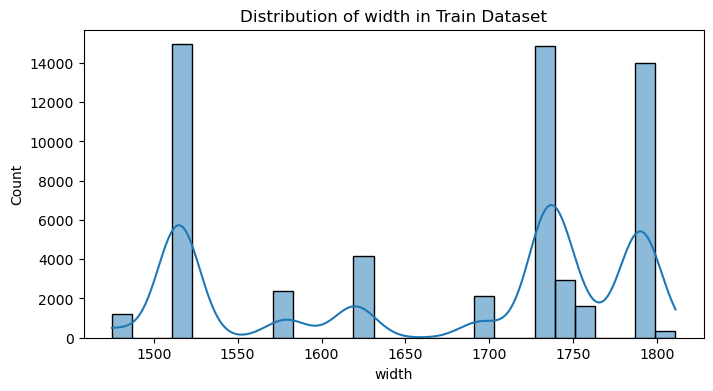

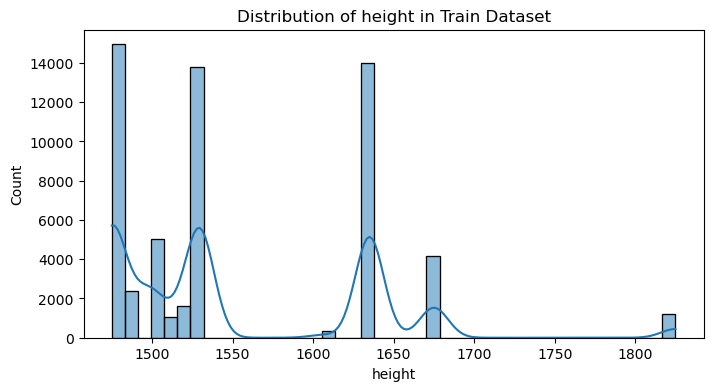

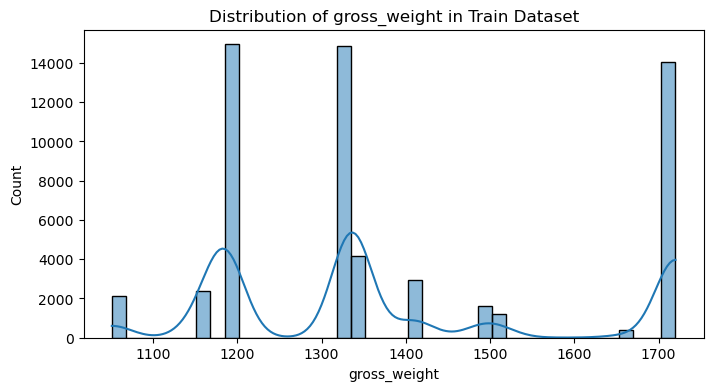

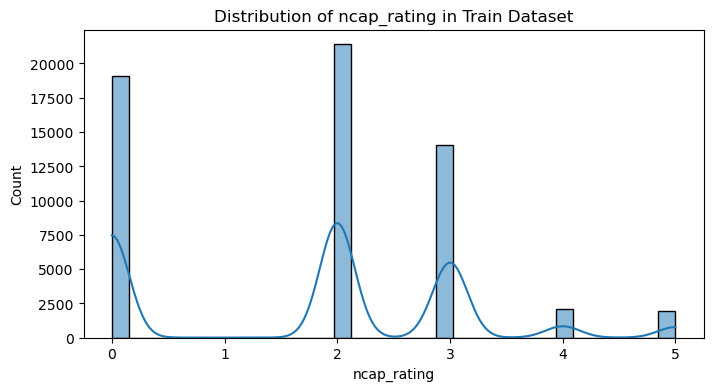

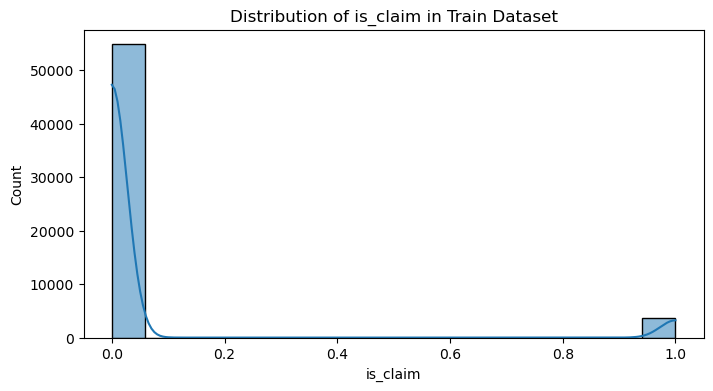

In [33]:
# Histogram for numerical columns in train dataset
numerical_cols_train = dfTrain.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols_train:
    plt.figure(figsize=(8, 4))
    sns.histplot(dfTrain[col], kde=True)
    plt.title(f"Distribution of {col} in Train Dataset")
    plt.show()


In [34]:
# Categorical columns in train dataset
categorical_cols_train = dfTrain.select_dtypes(include=['object']).columns

for col in categorical_cols_train:
    print(f"Value Counts for {col} in Train Dataset:\n", dfTrain[col].value_counts())
    print("\n")

# Categorical columns in test dataset
categorical_cols_test = dfTest.select_dtypes(include=['object']).columns

for col in categorical_cols_test:
    print(f"Value Counts for {col} in Test Dataset:\n", dfTest[col].value_counts())
    print("\n")


Value Counts for policy_id in Train Dataset:
 policy_id
ID58553    1
ID58554    1
ID58555    1
ID58556    1
ID58557    1
          ..
ID00004    1
ID00005    1
ID00006    1
ID00007    1
ID00008    1
Name: count, Length: 58592, dtype: int64


Value Counts for area_cluster in Train Dataset:
 area_cluster
C8     13654
C2      7342
C5      6979
C3      6101
C14     3660
C13     3423
C10     3155
C9      2734
C7      2167
C12     1589
C1      1468
C11     1212
C19      952
C6       890
C15      771
C4       665
C17      492
C16      401
C21      379
C18      242
C22      207
C20      109
Name: count, dtype: int64


Value Counts for segment in Train Dataset:
 segment
B2         18314
A          17321
C2         14018
B1          4173
C1          3557
Utility     1209
Name: count, dtype: int64


Value Counts for model in Train Dataset:
 model
M1     14948
M4     14018
M6     13776
M8      4173
M7      2940
M3      2373
M9      2114
M5      1598
M10     1209
M2      1080
M11      363
Name: cou

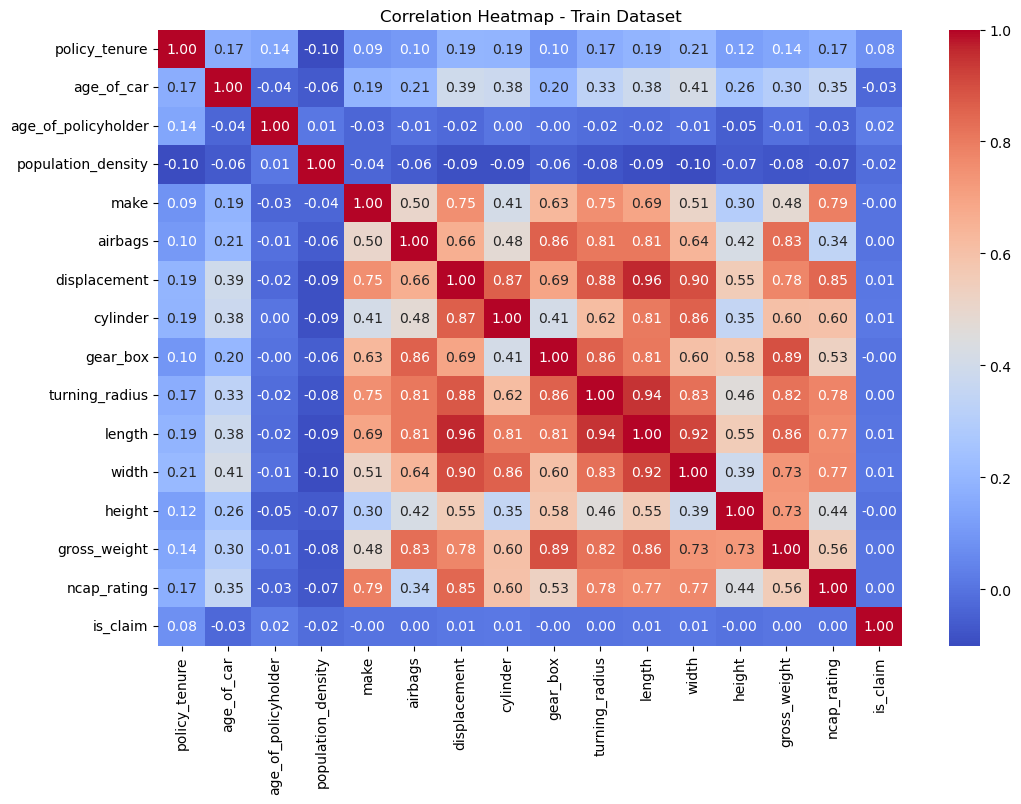

In [35]:
# Select only numeric columns for correlation
numeric_cols = dfTrain.select_dtypes(include=['number'])

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap - Train Dataset")
plt.show()


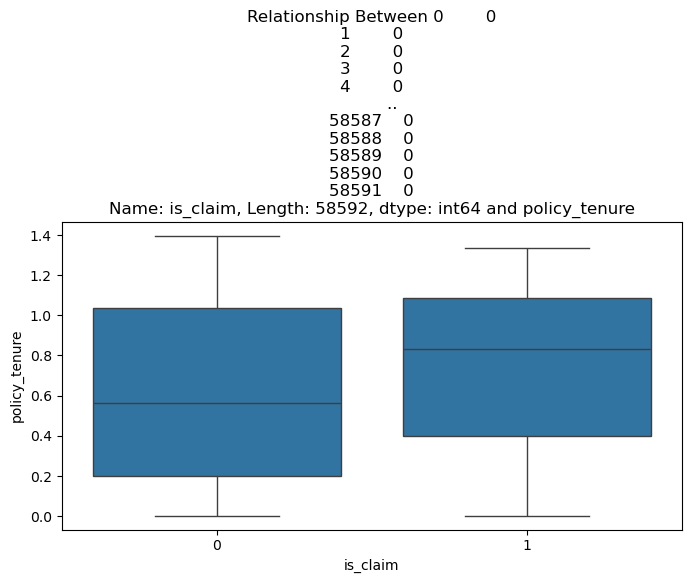

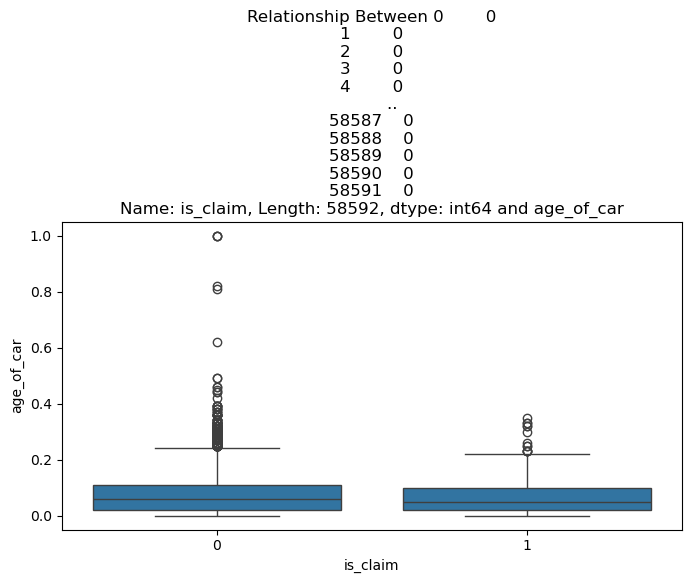

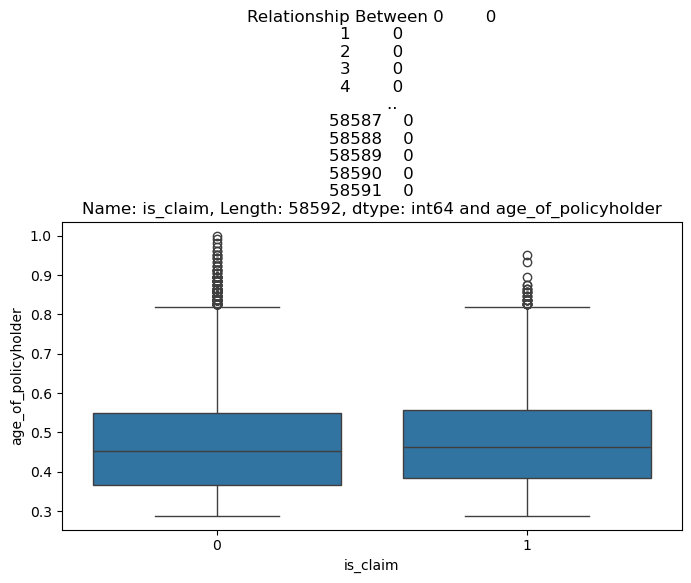

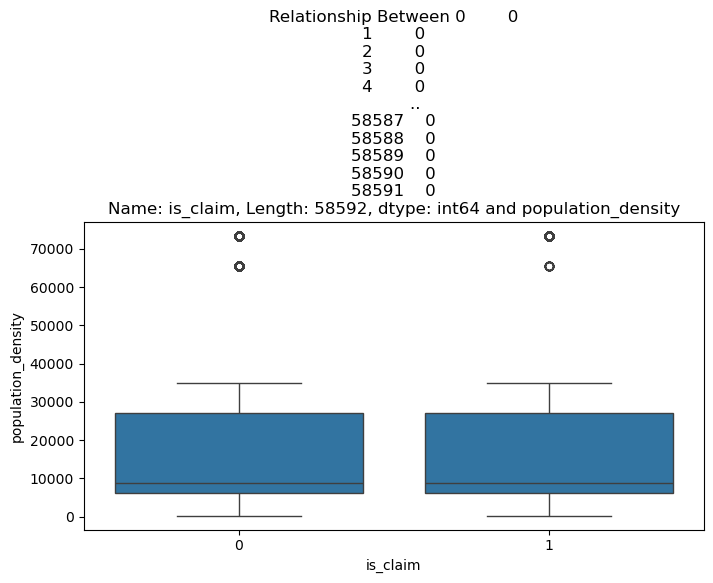

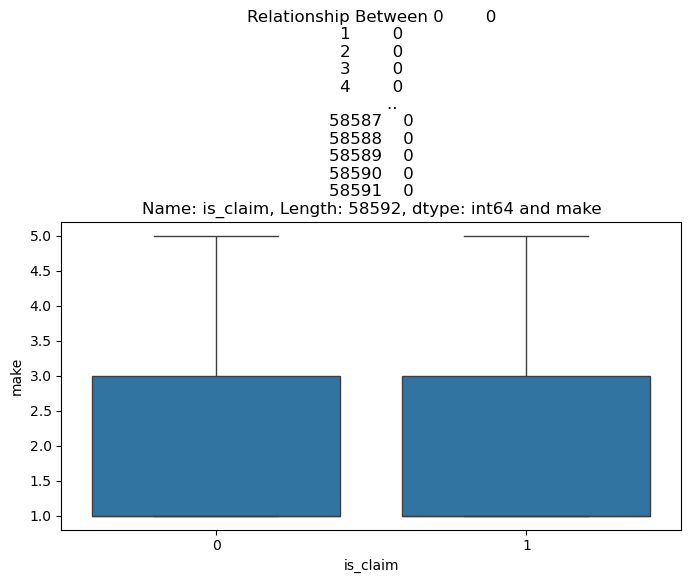

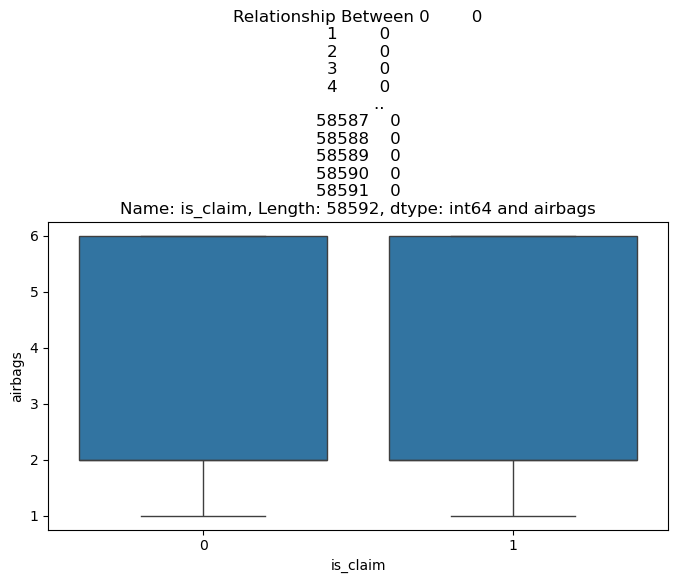

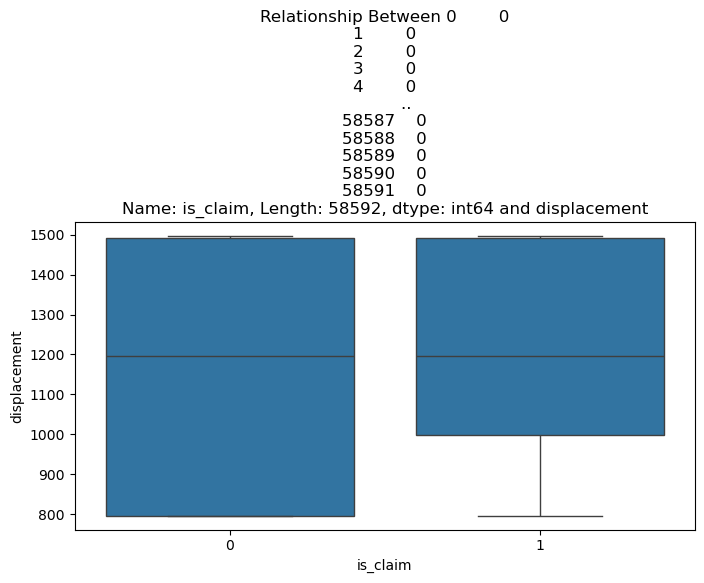

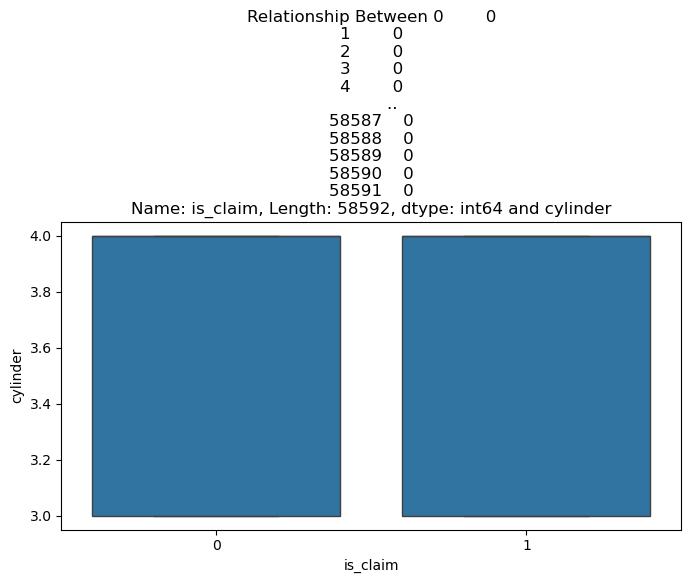

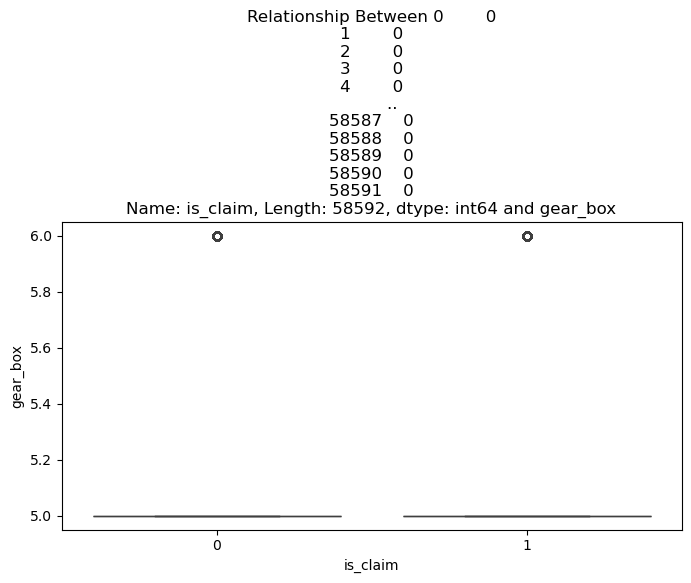

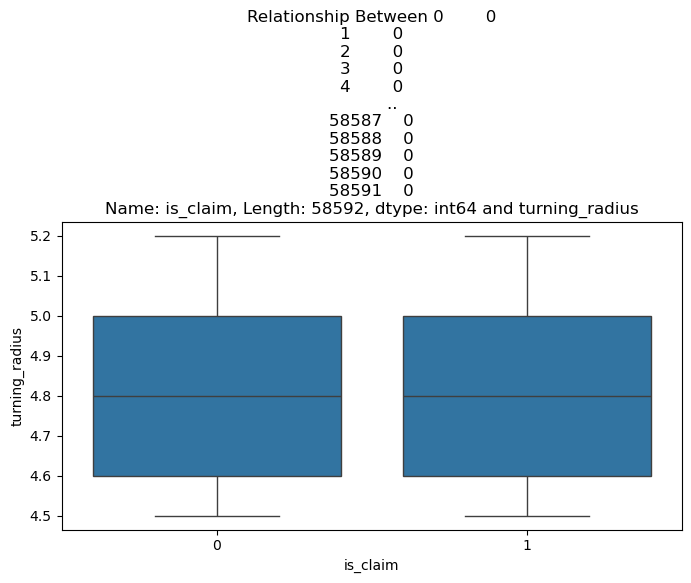

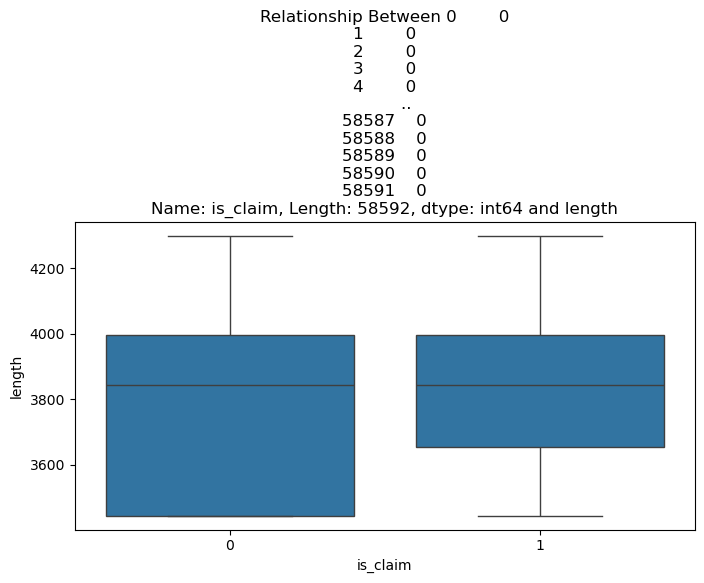

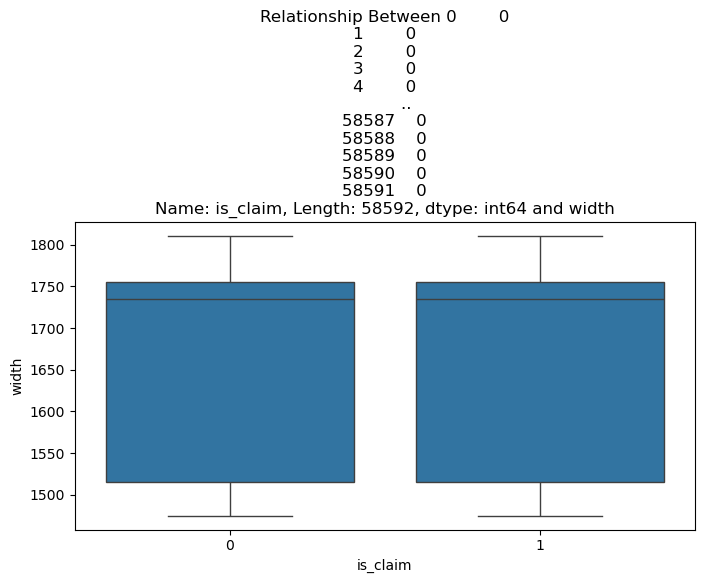

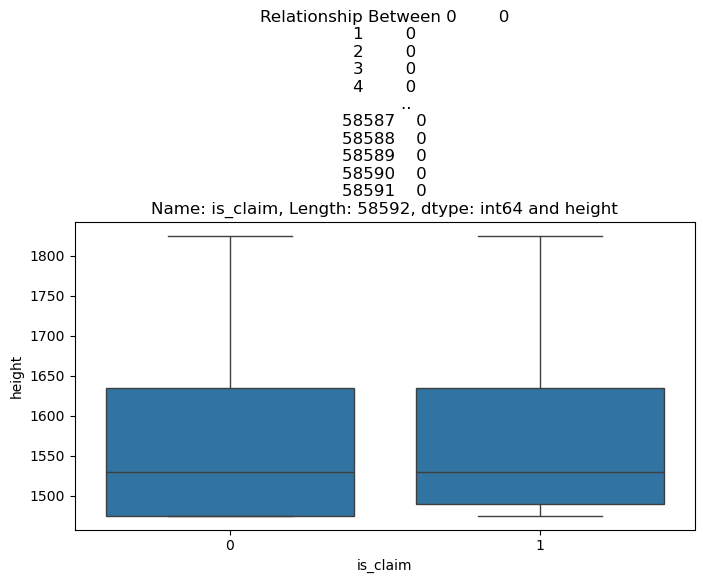

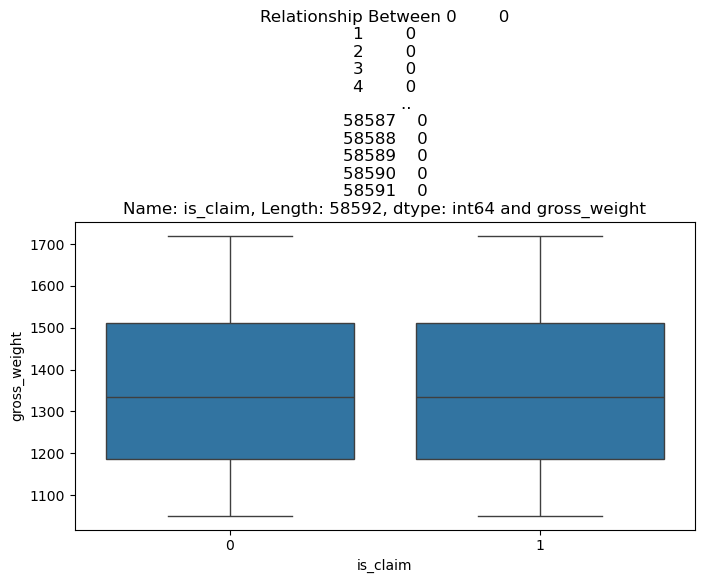

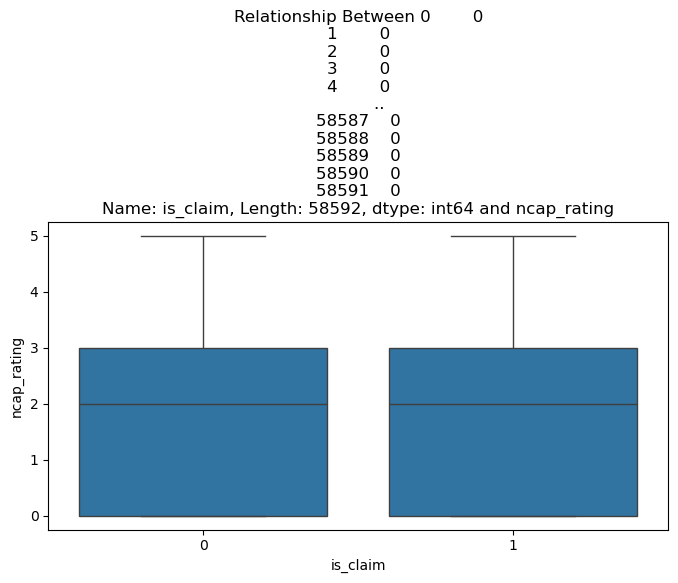

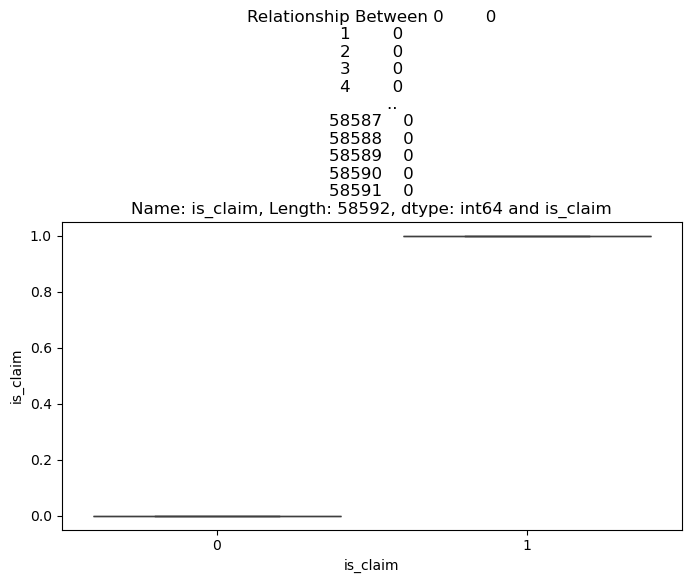

In [36]:
# Replace 'target_column' with the actual target column name in your dataset
target_col = dfTrain['is_claim']
for col in numerical_cols_train:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=dfTrain, x=target_col, y=col)
    plt.title(f"Relationship Between {target_col} and {col}")
    plt.show()


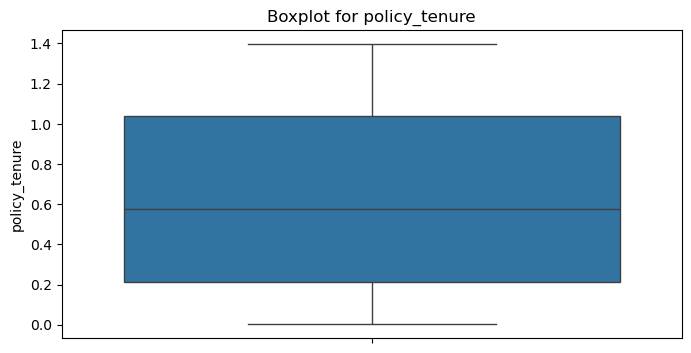

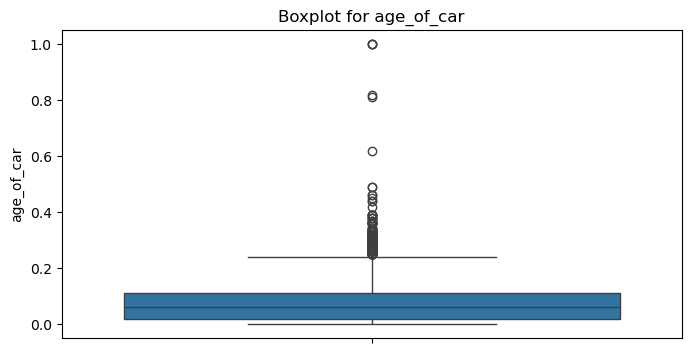

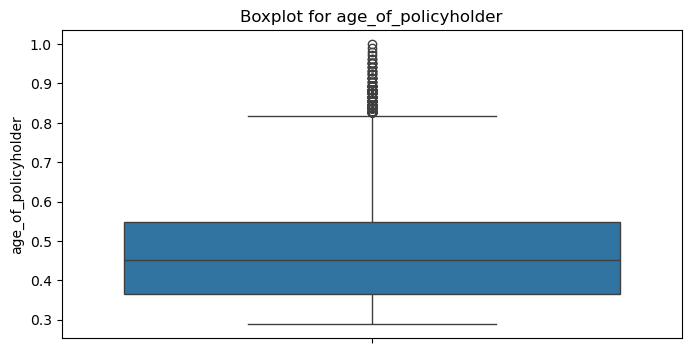

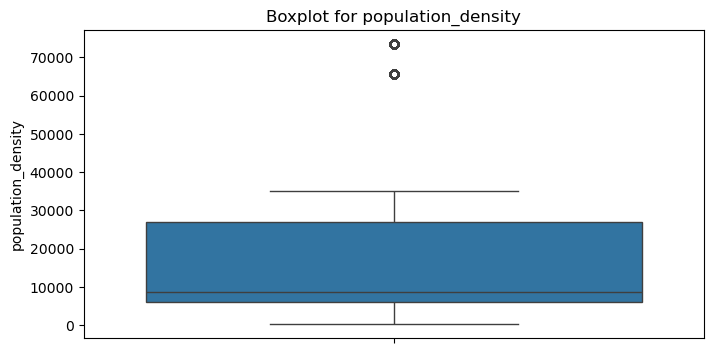

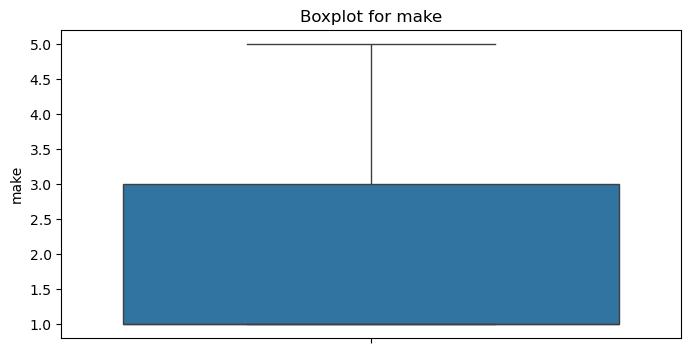

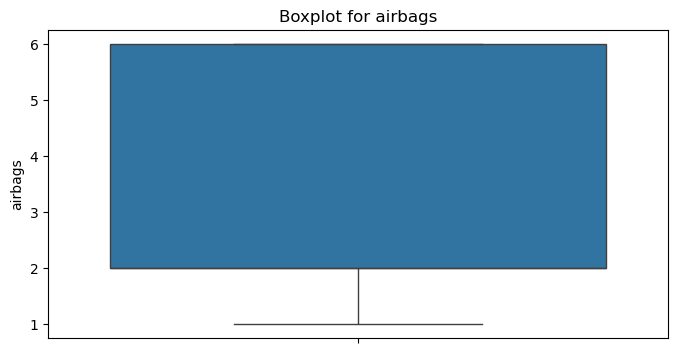

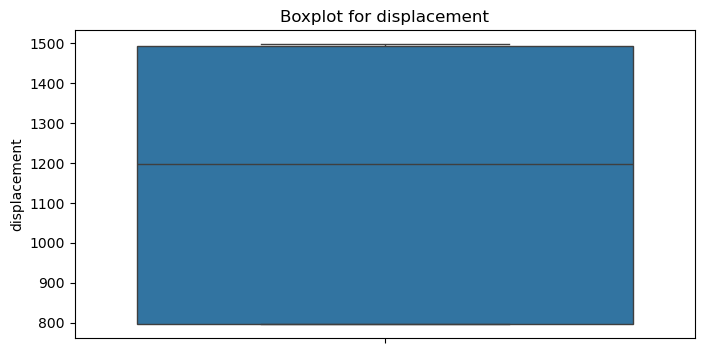

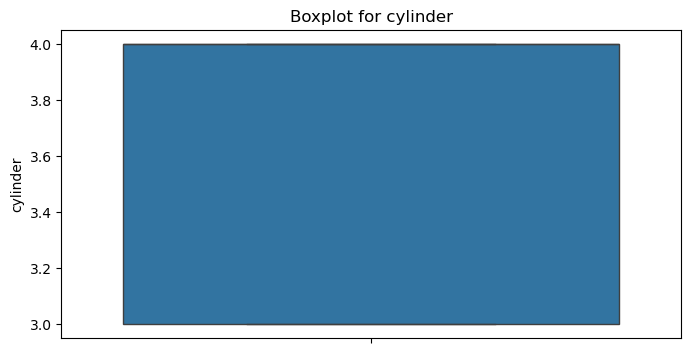

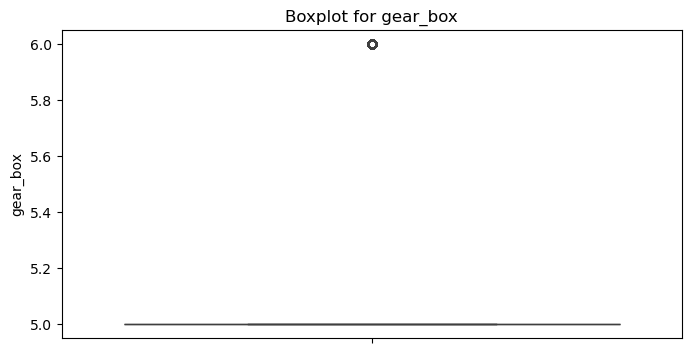

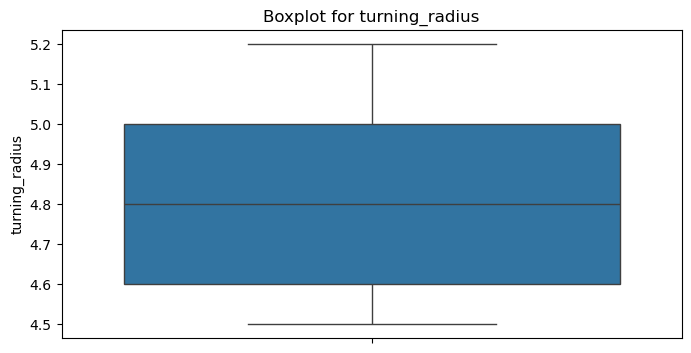

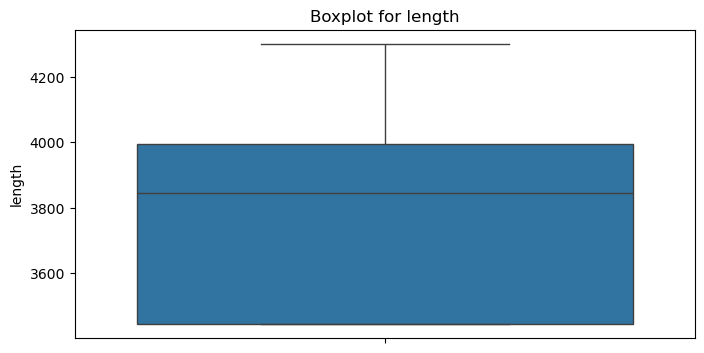

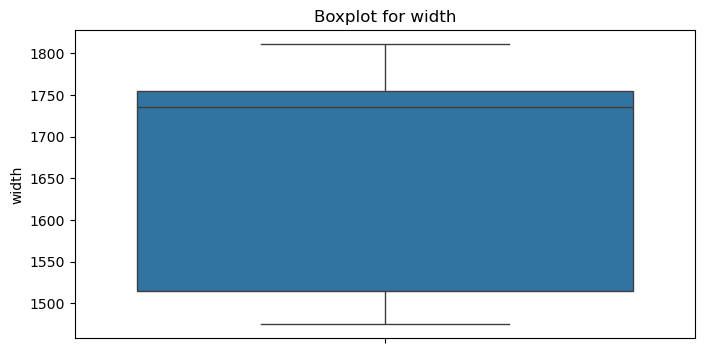

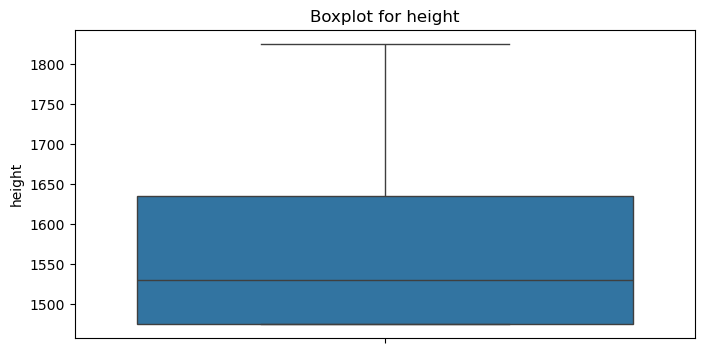

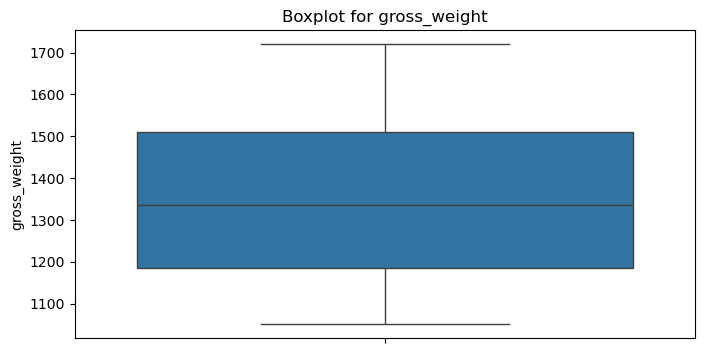

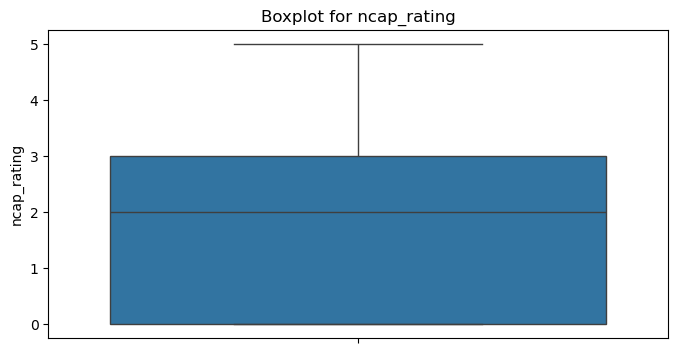

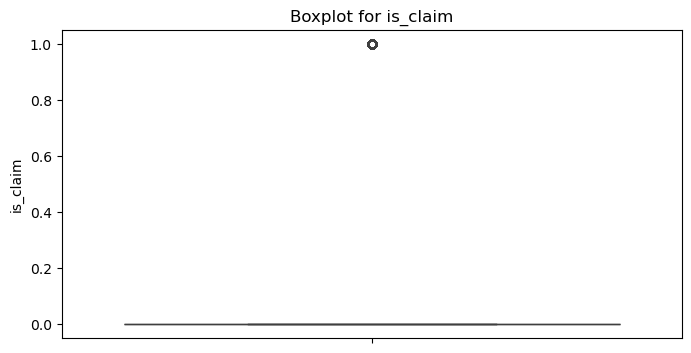

In [37]:
# Boxplots for outlier detection
for col in numerical_cols_train:
    plt.figure(figsize=(8, 4))
    sns.boxplot(dfTrain[col])
    plt.title(f"Boxplot for {col}")
    plt.show()


In [38]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

In [39]:
X_train = dfTrain.drop('is_claim', axis=1)  # Drop the target column
y_train = dfTrain['is_claim']  # Keep only the target column

In [40]:
#Swapping Yes and No to 1 and 0

binary_columns = ['is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
                  'is_parking_camera', 'is_front_fog_lights', 'is_rear_window_wiper',
                  'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
                  'is_power_door_locks', 'is_central_locking', 'is_power_steering',
                  'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
                  'is_ecw', 'is_speed_alert']

# Convert binary columns to 0/1
for col in binary_columns:
    X_train[col] = X_train[col].map({'Yes': 1, 'No': 0})



In [41]:
# Drop the policy_id column
X_train = X_train.drop('policy_id', axis=1)


In [42]:
dtype_summary = X_train.dtypes.value_counts()
print(dtype_summary)



int64      28
object     10
float64     4
Name: count, dtype: int64


In [43]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()

# Scale all numeric columns
X_train_scaled = scaler.fit_transform(X_train)

# Convert back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)


ValueError: could not convert string to float: 'C1'